
### Simple example to show that linear addition of independent uncertainties is an overestimate

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [140]:
# Expected value
zestimate = 3000 

# Independent uncertainties - std dev
dv = 10
dp = 9

In [141]:
# Linearly combine uncertainties
linear_stdev = dv + dp

# Non-linearly combine uncertainties (quadrature)
quadrature_stdev = np.sqrt(dv**2 + dp**2)


In [145]:
# Quadrature stdev < linear st_dev
quadrature_stdev,linear_stdev

(13.45362404707371, 19)

In [146]:
# Monte Carlo simulation for each uncertainty combination
n_sims = 10000

# Each value is randomly drawn from a normal distribution with std dev == linear_stdev centered around zero
l_dist = np.random.normal(0, linear_stdev, n_sims)

# Each value is randomly drawn from a normal distritbuion with std dev == quadrature_stdev centered around zero
quad_dist = np.random.normal(0, quadrature_stdev, n_sims)

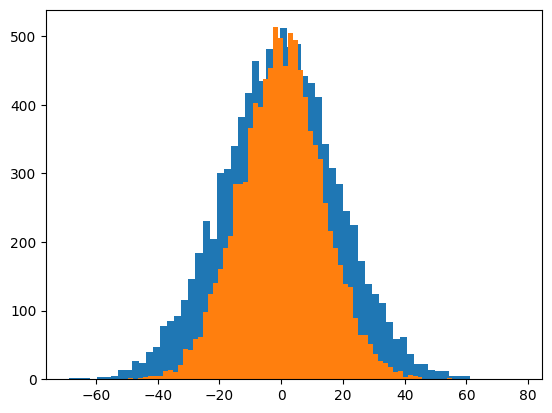

In [148]:
# np.histogram(l_dist)
_ = plt.hist(l_dist, bins='auto')
_ = plt.hist(quad_dist, bins='auto')
# plt.xlim([-60,60])

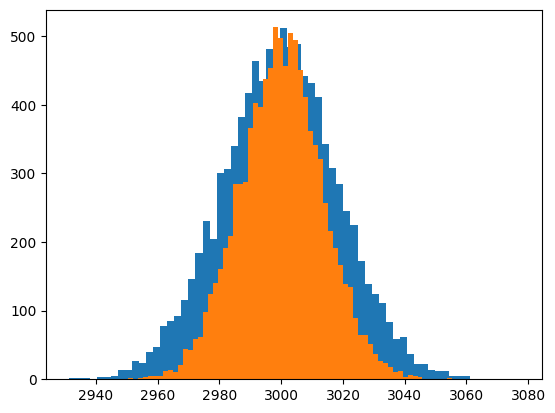

In [149]:
# Scale up distribution to expected value
linear_est = zestimate + l_dist
_ = plt.hist(linear_est, bins='auto')

quadrature_est = zestimate + quad_dist
_ = plt.hist(quadrature_est, bins='auto')

# plt.xlim([zestimate-60,zestimate+60])

In [151]:
# Check out some quantiles

quantiles = [0.1, .5, .683, .9]
for i in quantiles:
    print(f"P{int(i*100)}")
    print(np.quantile(linear_est, i))
    print(np.quantile(quadrature_est, i))
    print()

# zestimate + np.std(linear_est)/2 , zestimate + np.std(quadrature_est)/2

P10
2975.7634571594176
2982.624721735001

P50
2999.89212460849
3000.0202820531613

P68
3008.5400460422547
3006.201601261801

P90
3023.5156082986246
3016.9498458950543

